In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'D:\programing\datafileProject\archive\archive (1)\full_grouped.csv')

In [48]:
df.tail(2)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,month,Year-Month
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,07,2020-07
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,07,2020-07


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
#get only month form Date 
df['month'] = df['Date'].dt.strftime('%m')

**use groupby to get the new cases of each month** 

In [45]:
monthly_data = df.groupby([r'Country/Region', 'month']).agg({
    'New cases': 'sum',
}).reset_index()

In [29]:
import warnings
warnings.filterwarnings("ignore")

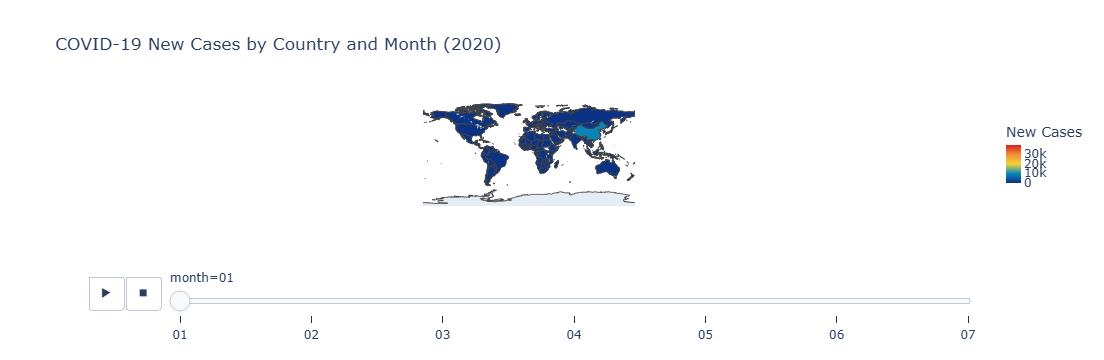

In [56]:
# Create the animated choropleth map
fig = px.choropleth(monthly_data,
                    locations=r"Country/Region",
                    locationmode='country names',
                    color="New cases",
                    hover_name=r"Country/Region",
                    animation_frame="month",
                    color_continuous_scale="Portland",
                    range_color=[0, monthly_data['New cases'].quantile(0.95)],  # Use 95th percentile to avoid outliers skewing colors
                    title="COVID-19 New Cases by Country and Month (2020)",
                    labels={"New cases": "New Cases", "Confirmed": "Total Confirmed"})

#Update layout for better appearance
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="New Cases",
        thickness=15,
        len=0.75
    )
)

fig.show()